# MNIST DATASET

# Aims of this pratical session

* to define and use different models in PytorchAPI, which is more genral than Sequential API we have used so far

* To  examine thr effect of batch nomalization and skip-forward connections on leaning with deep networks.

* To examine the effect of different amounts of regularization on the same architecture, and to plot a graph of training and validation error as a function of the amount of regularisation.

* to explore thr MNIST dataset and plot learing curves to estimate error rate as a function of training set size

* to do your own exploration of apllying idfferent architectures to the MNIST data( and possibly also to the CIFAR data during the week)


In [450]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormap

%matplotlib inline

In [451]:
import torch
import torch.nn as nn

In [452]:
import torch.nn.functional as F # this includes tensor that we can use in backwards pass

In [453]:
import torchvision

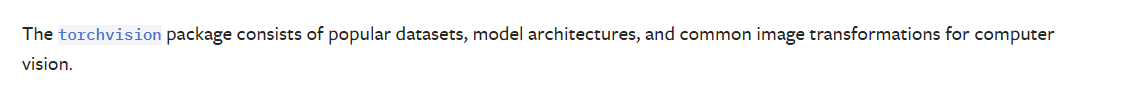


https://pytorch.org/vision/stable/index.html

In [454]:
import torchvision.datasets as datasets

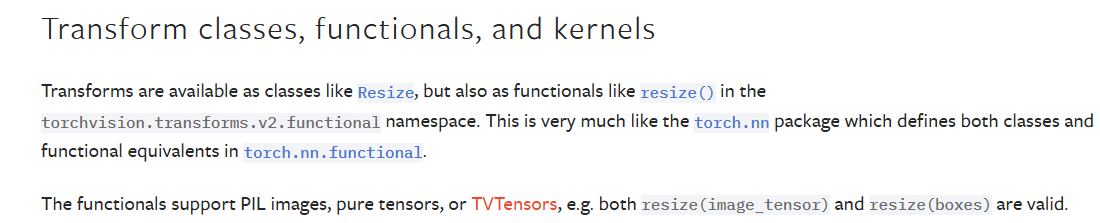

https://pytorch.org/vision/stable/index.html

In [455]:
from torchvision import transforms

# Pytorch datasets

Several well known datasets are provided with pytorch, and can be imported and easily used.

The MNIST dataset is a famous and has been used as a testbed of machine learning algorithms for more than 25 years. 

There is an interesting dataset called fashion_MNIST which is a plug-in replacement for the MNIST dataset, but which may have very different properties (it is grey-scale images). (It is possible that you may need to download this from the web if you want to use it. )

In [456]:
transform_list = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.0],std=[1.0])])

In [457]:
mnist_trainset = datasets.MNIST(root= './data', train=True, download=True, transform=transform_list)
mnist_trainset.data.shape

torch.Size([60000, 28, 28])

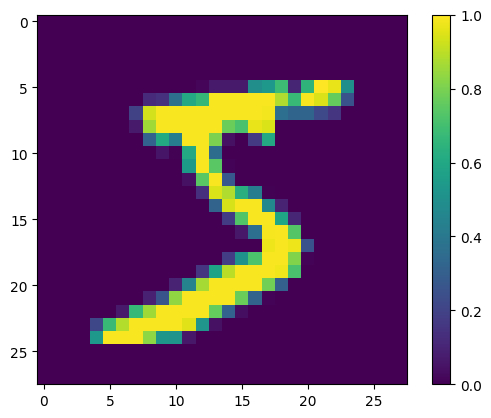

In [458]:
plt.imshow(mnist_trainset[0][0].view(28,28).numpy())
plt.colorbar()

In [459]:
mnist_trainset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

The normalisation it is important to make the imputs of a defined size and -- most importantly -- that the imputs should be of roughly similar typical saize.(28,28)

The reason for ensuring that inputs are of similar typical magnitudes is that the gradient of an input weight is proportional to the input: if we increase the typical values of one input by a factor of 10, the weight must be reduced by a factor of 10, but its gradients will increase by a factor of 10... This makes optimisation more difficult. 

Let us use a smaller set of data to train with at first, so that you can do more experiments more quickly. Let's take the first 4000 training examples only: 

In [460]:
mnist_trainset_small = [mnist_trainset[i] for i in range(0,4000)]

In [461]:
mnist_testset = datasets.MNIST(root= './data', train=False, download=True, transform=transform_list)

In [462]:
type(mnist_trainset) 

torchvision.datasets.mnist.MNIST

In [463]:
mnist_testset.data.shape

torch.Size([10000, 28, 28])

In [464]:
len(mnist_trainset)

60000

Training set consist of a list of 60000 pairs, each of which in an image and a digit(label)

The fisrt to do with any data is to look at it.

In [465]:
im0 = mnist_trainset[3][0]
im0.shape

torch.Size([1, 28, 28])

In [466]:
label = mnist_trainset[3][1]
print(label)

1


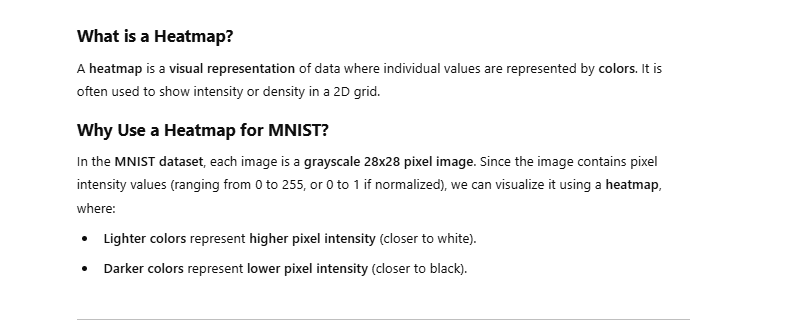

to diplay this as a heatmap in numpy we need to reshape form (1,28,28) to (28,28), and convert to a numpy array:

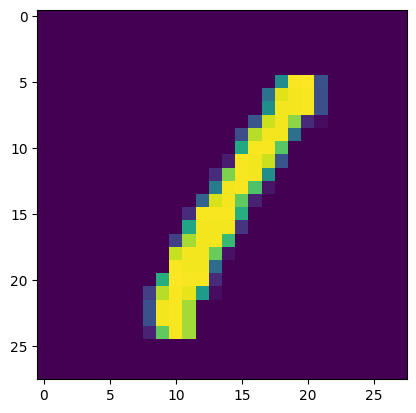

In [467]:
plt.imshow(im0.reshape(28,28).numpy()) # to pass it to matplolib, we need to convert it to a 2 dimetional numpy array

let's look at more of the digits 

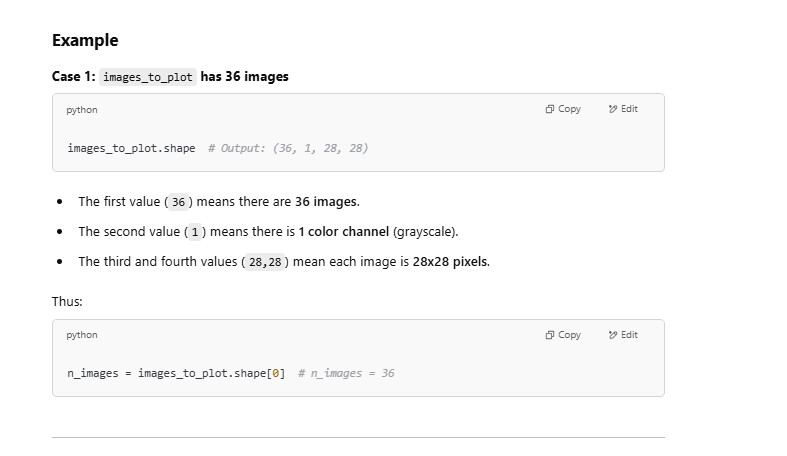

In [468]:
#this funstion will plot a grid of images with their label(title)

# This function will plot a grid of images with their titles
 

def plot_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,18)):
    
    n_images = images_to_plot.shape[0]
    
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten() # we can number the axes from 0 upwards with a single integer

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,0,:,:].reshape(28,28), cmap=cm.Greys ) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

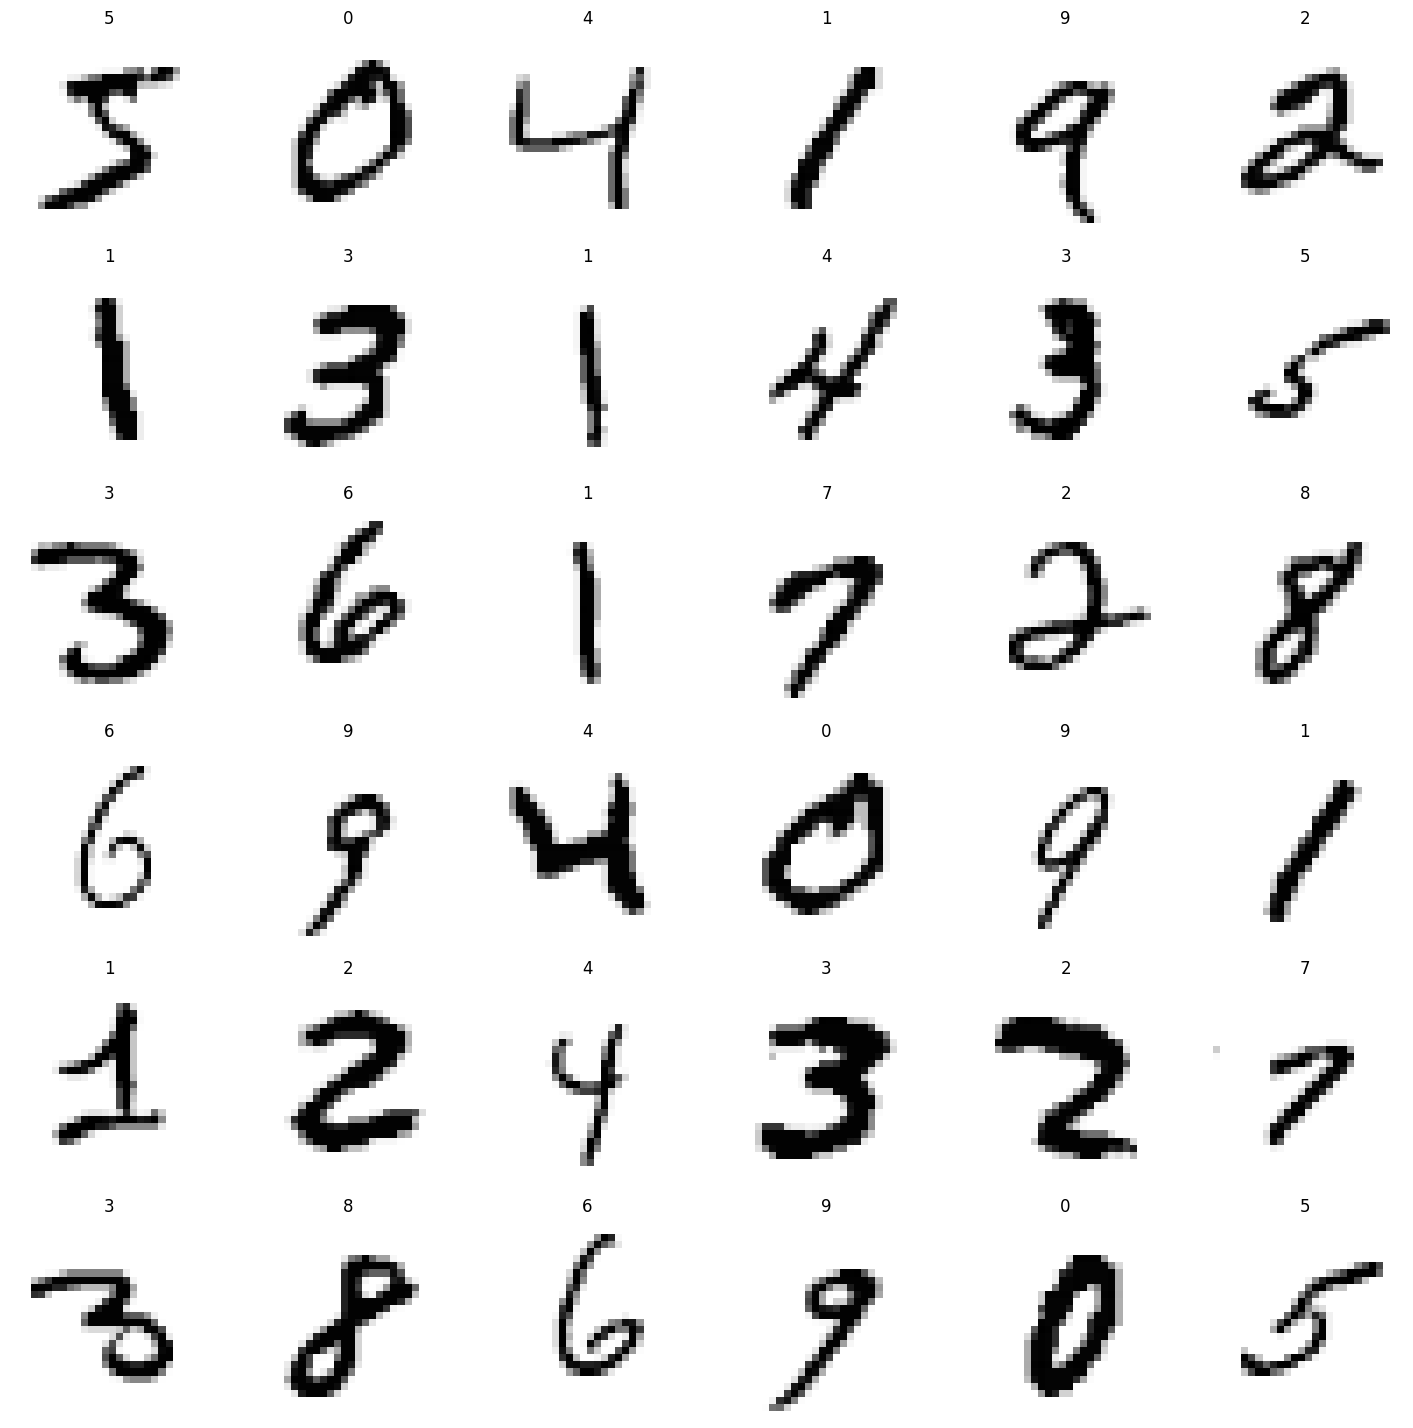

In [469]:
images_to_plot = np.array([mnist_trainset_small[i][0].numpy() for i in range(0,36)]) #feautere 
titles = [mnist_trainset_small[i][1] for i in range(0,36)]
plot_images(images_to_plot, titles)

Classifying these isn'tr easy: look how different the 4s are form each other, and the 5s.

Take a moment to look at the images carefully: what do you think are the difficulties of classifying these with a neural net?  How large are the features that you would need to use? 

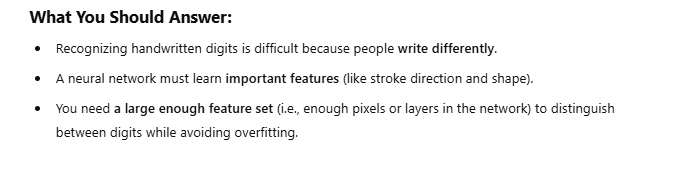

# Neural network model  for MNIST classification

It is best not to use the entire MNIST dataset as datest as training set becase training set because you will be training for whole of the pratical class. You will learn much more by training repeaedly on smaller substes, and examining the effect of using diffent models and parameteres. 

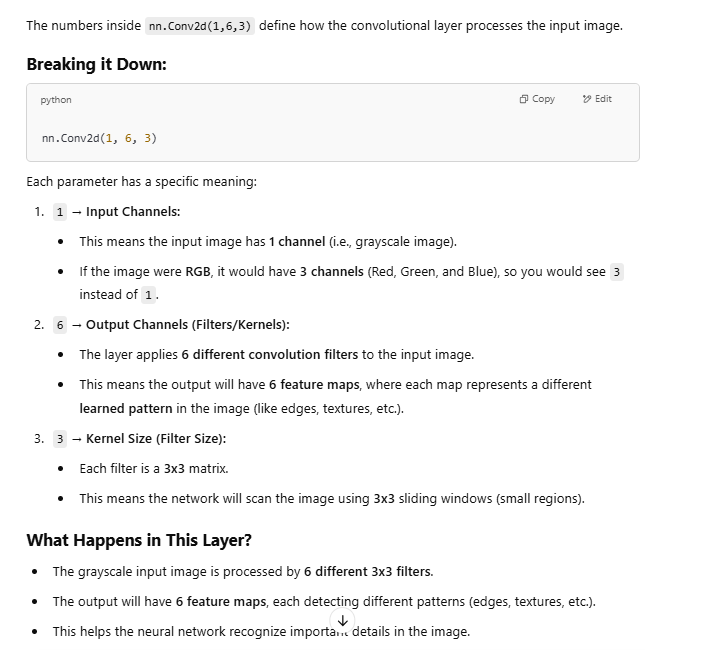

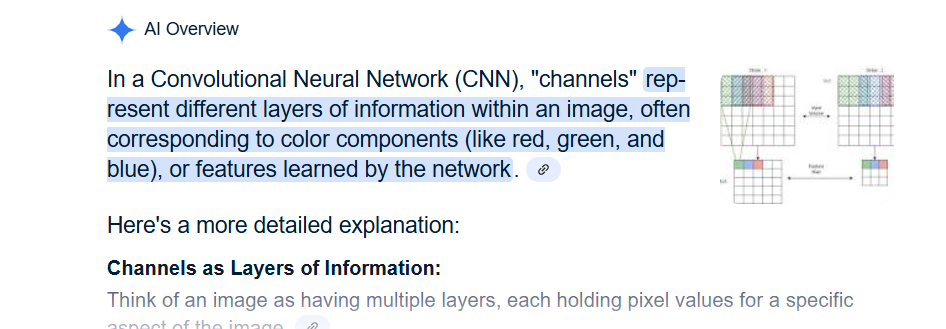

In [470]:
model1 = nn.Sequential( 
        nn.Conv2d(1,6,3), # takes one input channel (greyscale), gives 6 output channes, each from a 3x3 convolutional neuron
        nn.ReLU()) 
      #  nn.Conv2d(6,6,3), # takes 26 x 26 to 24 x 24
       # nn.ReLU(), 
      #  nn.MaxPool2d(2,2) )
    

In [471]:
type(model1)

torch.nn.modules.container.Sequential

In [472]:
mnist_trainset[0][0].shape


torch.Size([1, 28, 28])

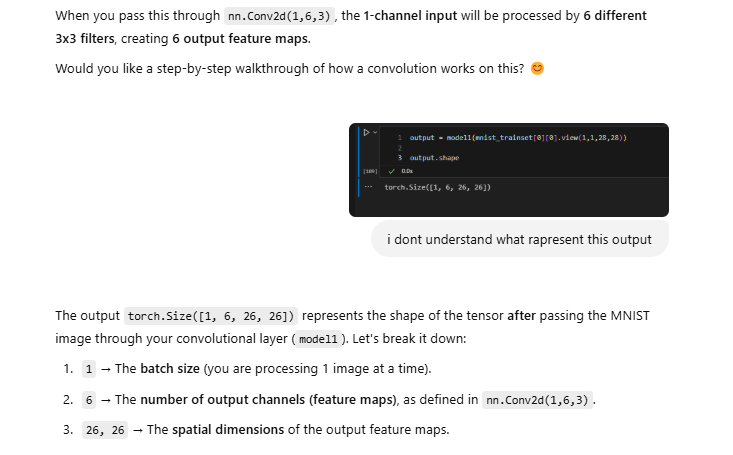
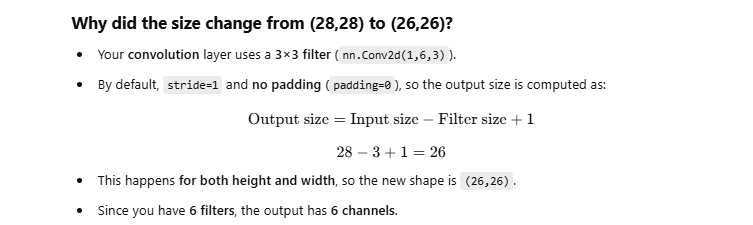

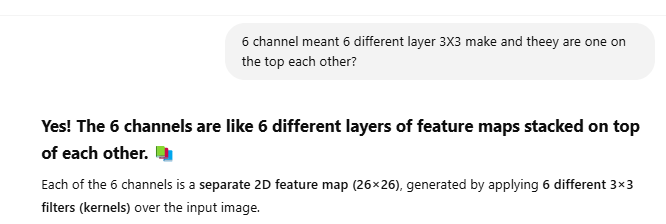

In [473]:
output = model1(mnist_trainset[0][0].view(1,1,28,28))

output.shape

torch.Size([1, 6, 26, 26])

In [474]:
model1 = [] #reclaim thre space

Generally it is better practice to construct a NN by subclassing the pytorch class nn.Module, so that we have all the code necessary for initialising the neural net and doing the forward pass in one place.  

(A very common and easy mistake in working with a NN is to forget to re-initialise it, and then train it repeatedly under different conditions without resetting the weights to random initialised values: this produces bad experimental results, which may take a while to identify...therefore it is MUCH SAFER to automatically provide yourself with a class for your NN so that you can automatically initialise new instances of it...) 

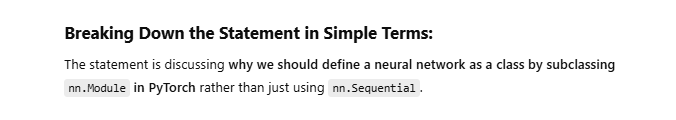

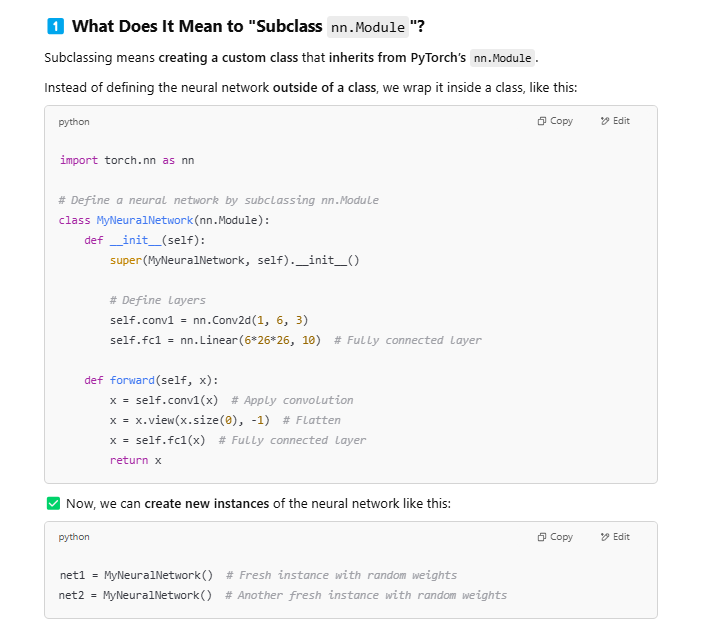

In [475]:
#our simpplst NN - it is just going to be a linear layer and then softmax
class NN1(nn.Module):

    def __init__(self):
        super(NN1,self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784,10)) #a linear layer(a matrix, plus biases) with 784 inputs 
            #and 10 outputs
            #and 10 outputs
            # if we are going to make probabilistic categorical predictions, it is more flexible to allow unnormalised 
            # outputs, because we can use  different functions for the predictions and and in calculating the loss, as 
            # we shall soon see

    def forward(self, x): # computes thr forward pass ... this one is particularly pimple
        x = self.layers(x)
        return x

In [476]:
nn1 = NN1()

In [477]:
tmp = nn1.forward(mnist_trainset[0][0])
tmp

tensor([[-0.0209, -0.2698,  0.0933, -0.0479,  0.0791,  0.1385, -0.0075, -0.0284,
         -0.1705, -0.1055]], grad_fn=<AddmmBackward0>)

thris output consist of unbounded positive and negative valus- It needsto be converted to probabilities to make a probabilistyic predictions of each of the 10 classes.

The standard and most commonly used method of mapping arbitray numeric values to perobabilities is softmax




In [478]:
tmp_probs = F.softmax(tmp, dim=1)
tmp_probs

tensor([[0.1006, 0.0785, 0.1128, 0.0979, 0.1112, 0.1180, 0.1020, 0.0999, 0.0866,
         0.0925]], grad_fn=<SoftmaxBackward0>)

As we might hope, these predictions are random values of approximately 0.1 : this is what we should expect, because the network has been initialised with random weights, and it has not yet learned to make good predictions. 

Now, the true class of the 0th item in the trainset is 5. 

Let us find the log-loss for this prediction:

In [479]:
tmp_probs_n = tmp_probs.detach().numpy()
tmp_probs_n

array([[0.10062661, 0.07845588, 0.11279823, 0.09794314, 0.11120874,
        0.1180093 , 0.10198568, 0.09987208, 0.08664031, 0.09246006]],
      dtype=float32)

In [480]:
tmp_probs_n[0,5]

np.float32(0.1180093)

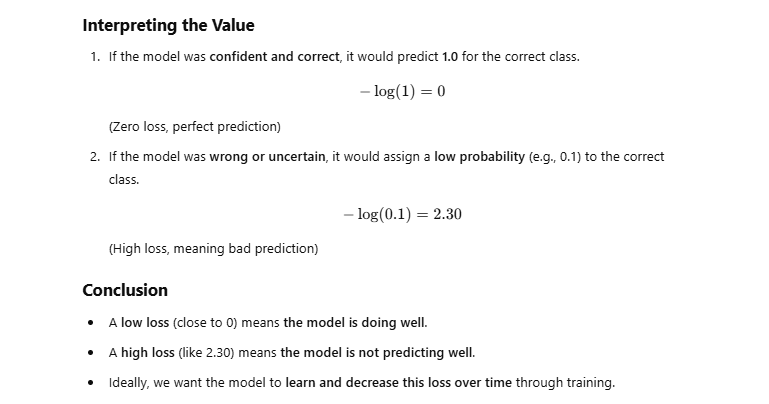

In [481]:
-np.log(tmp_probs_n[0,5])

np.float32(2.136992)

At last: this is the log-loss, which is the negative log of the predicted probability of the true class (in this case 5) 

A typical predicted probability will be near to 0.1, with a loss that is near to -np.log(0.1) which is -2.30

Our next task is to construct the loss function, which will produce a single loss for a batch of examples. This is the final leaf of the computational graph, from which we back-propagate to find the gradients. 

There is a single torch function that will take unnormalised outputs, and combine softmax and log-loss efficiently:

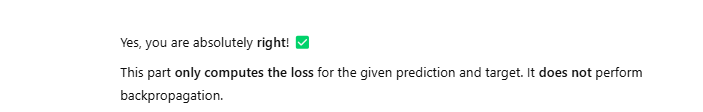

In [482]:
loss_function =  nn.CrossEntropyLoss()

In [483]:
#tmp is forward propagation
loss_function(tmp,torch.LongTensor([5]))

tensor(2.1370, grad_fn=<NllLossBackward0>)

Excellent - this loss should be the same as the one we computed directly 

We now need to check that we can compute the losses correctly for a batch of training examples

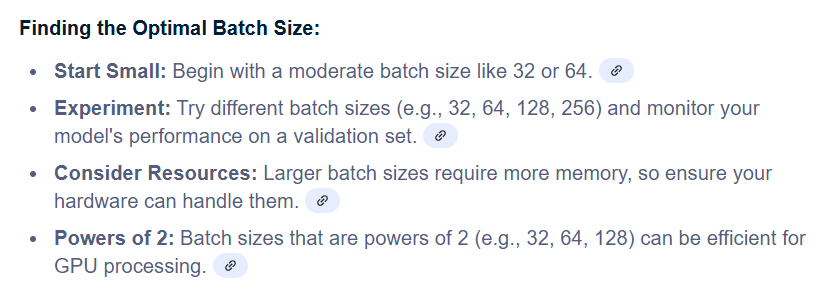

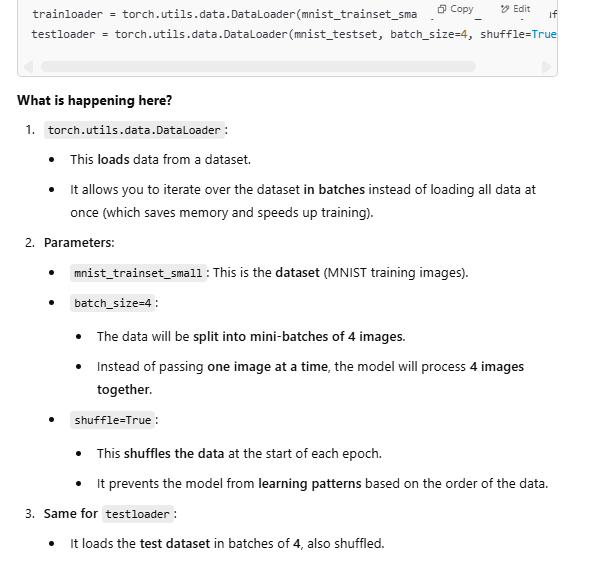

In [484]:
#dataLoader is a useful utility class provided by pytorch for extracting minibatches from a large datasets.
# 

trainloader = torch.utils.data.DataLoader(mnist_trainset_small, batch_size=4,shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_testset,batch_size=4,shuffle=True)

#if you want to change the beatch size, you need to define a new dataloader:
#the loader is a lightweight class theat just provides iteration over tthe ditaset.

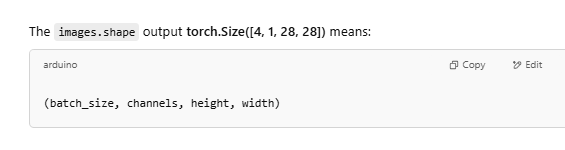

In [485]:
#we construct a (temporary) iteration from trainloader, and we get the first minibatc
tmpiter = iter(trainloader)
images, labels = next(tmpiter) # this minibatch is a list of [images, labels]

print(images.shape,labels)

torch.Size([4, 1, 28, 28]) tensor([4, 1, 8, 2])


In [486]:
tmp = nn1.forward(images)
tmp 

tensor([[ 0.2365, -0.3334,  0.2212, -0.0877, -0.0972,  0.0802, -0.0046,  0.2603,
         -0.1916,  0.1576],
        [-0.3178, -0.0729,  0.0405, -0.0347,  0.0720, -0.0190, -0.0528,  0.0424,
         -0.1242, -0.0211],
        [-0.0899, -0.1606, -0.1586,  0.0343,  0.1002,  0.1660, -0.2575, -0.1341,
         -0.3250, -0.0461],
        [-0.0384,  0.1627, -0.0118, -0.0013, -0.0249,  0.1772, -0.3565, -0.2216,
         -0.0540, -0.0122]], grad_fn=<AddmmBackward0>)

In [487]:
#finally we compute thw loss: the loss function compute all the individual losses, and averages them
loss_function(tmp, labels) 


tensor(2.4030, grad_fn=<NllLossBackward0>)

By calling the .backward() method on the output of the loss_function, we can back-propagate and compute the gradients of the loss wrt all the weights. 

To optimise the weights, it is convenient to use another class, that takes the neural net parameters, and updates them using the gradients. Many optimisation methods - such as RMSProp and ADAM - require additional data structures (moving averages of gradients and squared gradients). 

The .parameters() method gives the parameters of the network. 

In [488]:
nn1.parameters()

<generator object Module.parameters at 0x000001FBC3581E00>

In [489]:
params = [p for p in nn1.parameters()]

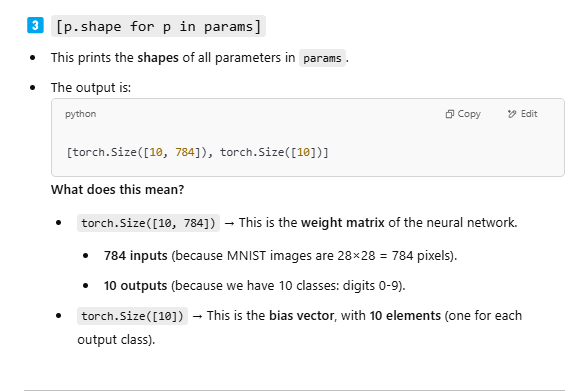

In [490]:
[p.shape for p in params]

[torch.Size([10, 784]), torch.Size([10])]

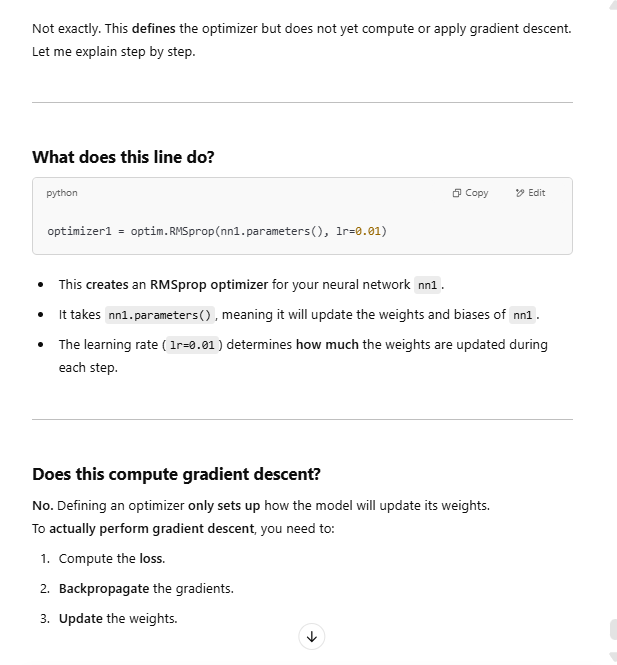

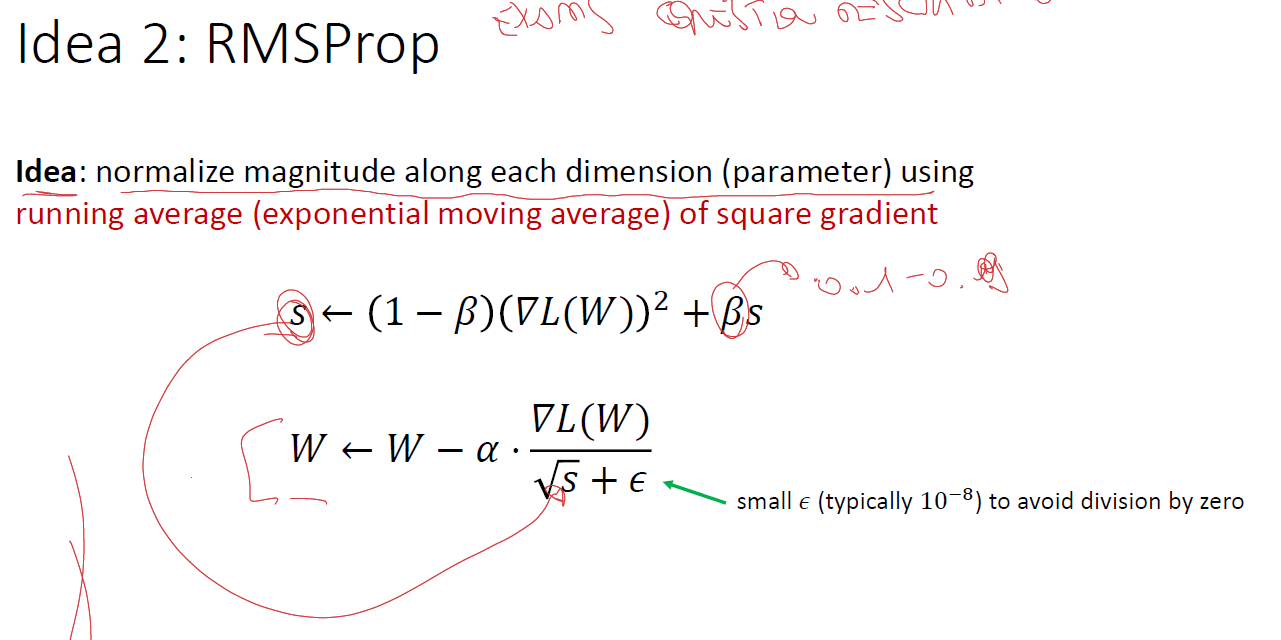

In [491]:
import torch.optim as optim

optimizer1 = optim.RMSprop(nn1.parameters(), lr=0.01)
optimizer1

RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)

# Now we are ready to consturct a learing loop

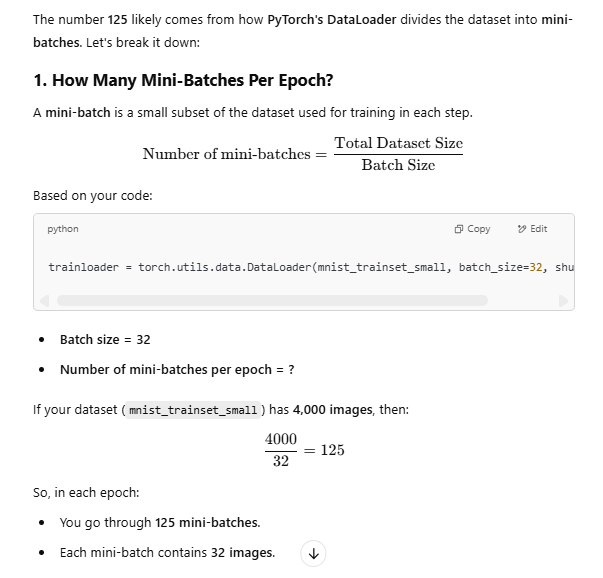
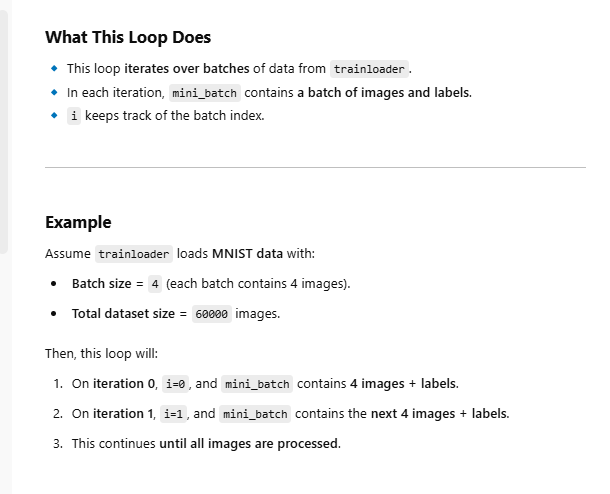
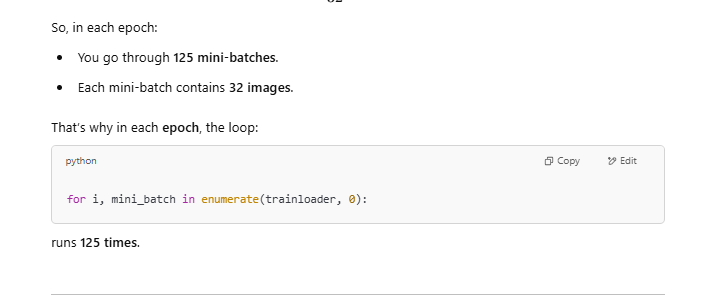
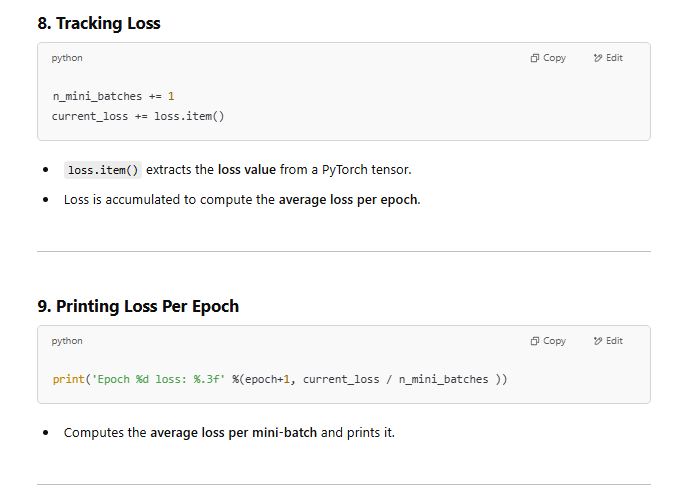

In [492]:
# notice that we create all the ingredients of the process again withtin this cell, so that we train a newly initialised neural net with a newly inizialised optimizer containing the parameters of that neural net ...



trainloader = torch.utils.data.DataLoader(mnist_trainset_small, batch_size= 32, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_testset,batch_size=32,shuffle=True)

nn1 = NN1()
optimizer1 = optim.RMSprop(nn1.parameters(),lr=0.0001)




for epoch in range(200): #number of time loop over the dataset
    current_loss = 0.0
    n_mini_batches = 0
    nn1.train() #setr train mode
    for i, mini_batch in enumerate(trainloader, 0):
        images, labels = mini_batch
        #zero the parameter gradients
        #all thr paramters that are being updated are in the optimizer,
        #so if we zero the gradients of all the tensors in the optimizer,
        #that is the safest way to zero all the gradients
        optimizer1.zero_grad()
        outputs = nn1(images)
        loss = loss_function(outputs, labels)
        loss.backward() # does the backward pass and computes all gradients
        optimizer1.step() #pdate all the weight.

        n_mini_batches += 1
        current_loss += loss.item() #remember that the loss is a zero-order tensor
        #so that to extract its value, we use .itme(), as we cannot index as there are no dimentions
        #print(f"n_mini_batches {mini_batch}")
    
        ave_loss = current_loss / n_mini_batches
        #ave_acc = 1- (ave_loss)
    nn1.eval() #evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): #disable gradient coomputation
        for data in testloader:
            images, labels = data
            outputs = nn1(images) #forward pass
            _,predicted = torch.max(outputs, dim=1) #get predicted calsses
            total += labels.size(0) #count total label in batch
            correct += (predicted == labels).sum().item()  #count correct

    
    val_accu = 100*(correct / total)  
    print('Epoch %d loss: %f validation accurancy: %f' %(epoch+1, current_loss / n_mini_batches,val_accu))
 






Epoch 1 loss: 1.931309 validation accurancy: 73.960000
Epoch 2 loss: 1.571677 validation accurancy: 79.120000
Epoch 3 loss: 1.351842 validation accurancy: 80.290000
Epoch 4 loss: 1.185860 validation accurancy: 81.360000
Epoch 5 loss: 1.055887 validation accurancy: 82.390000
Epoch 6 loss: 0.951966 validation accurancy: 83.220000
Epoch 7 loss: 0.868065 validation accurancy: 83.660000
Epoch 8 loss: 0.799193 validation accurancy: 84.400000
Epoch 9 loss: 0.742088 validation accurancy: 84.860000
Epoch 10 loss: 0.694430 validation accurancy: 85.290000
Epoch 11 loss: 0.654545 validation accurancy: 85.670000
Epoch 12 loss: 0.620516 validation accurancy: 86.100000
Epoch 13 loss: 0.591179 validation accurancy: 86.240000
Epoch 14 loss: 0.565821 validation accurancy: 86.570000
Epoch 15 loss: 0.543560 validation accurancy: 86.810000
Epoch 16 loss: 0.523832 validation accurancy: 86.940000
Epoch 17 loss: 0.506283 validation accurancy: 87.180000
Epoch 18 loss: 0.490441 validation accurancy: 87.520000
E

## Calculating accuracy and error rate

It's a good idea to turn off gradient computations when 

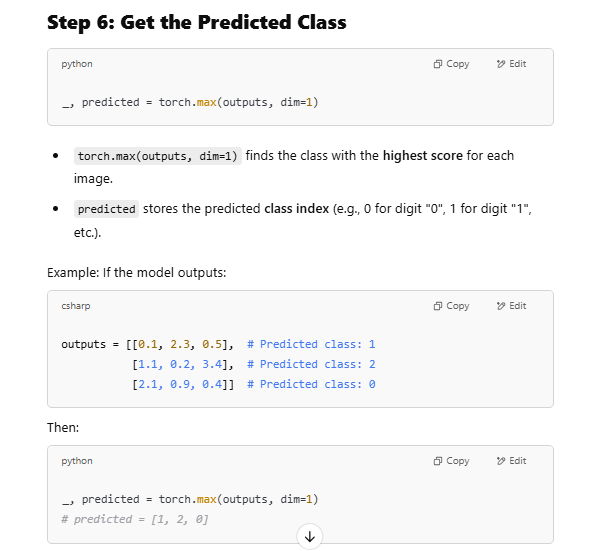

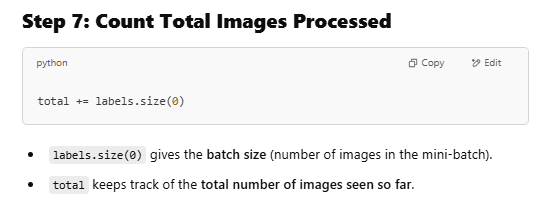

## Calculating Validation accuracy and loss

It's a good idea to turn off gradient computations when 

In [493]:


#this ocde calculat3es the error rate on validation set
correct = 0
total = 0 
with torch.no_grad(): # we do not need to compute the gradients when making predictions on the validation set
    for data in testloader:
        images, labels = data
        outputs = nn1(images)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0) #the number of labels, which is just the size of the batch
        correct += (predicted == labels).sum().item()# the sum is a zero dimentional tensor.

accuracy = (correct/total)
error_rate = (1 - accuracy)*100
print(f"Accuracy: {accuracy*100:.4f}")

Accuracy: 90.3600
